Want to establish a lower bound for the difference of persistence images in terms of Wasserstein.

$C \cdot W_2(X,Y)^2 \leq |PI(X) - PI(Y)|$

In [1]:
%matplotlib widget
import gudhi as gd
from gudhi import wasserstein
import persim
from persim import PersImage
from persim import *
from persim import wasserstein


import matplotlib.pyplot as plt
import numpy as np
#from igraph import *
from scipy import sparse
import ripser
from numpy.random import default_rng

from scipy import special
import scipy.optimize as spo 


In [41]:
rng = default_rng(0)
rng.exponential(10,size=(2,2))

array([[ 6.79931904, 10.19597101],
       [ 0.19806663,  0.02269327]])

In [42]:
def randomPD(card):
    #pd = rng.random((card,2))
    pd = rng.exponential(10,size=(card,2))
    #pd[:,0]=rng.random(card)
    #pd[:,1]=rng.random(card)
    return pd

In [43]:
def skewWasserstein2sq(X,Y):
    Xt = np.array(X)
    Xt[:,1]=Xt[:,1]+Xt[:,0]
    Yt = np.array(Y)
    Yt[:,1]=Yt[:,1]+Yt[:,0]
    return gd.wasserstein.wasserstein_distance(Xt,Yt,order=2, internal_p=2)#**2

In [45]:
N = 10000

f, ax = plt.subplots(figsize=(8,8))
X = randomPD(10)#np.array([[0,0]])
#Yn = [randomPD(3) for n in range(0,N)]#[np.array([[0,0+1/n]]) for n in range(1,N+1)]
Yn=[X+rng.normal(0,1,X.shape) for n in range(0,N)]
ax.scatter(X[:,0],X[:,1])
ax.scatter(Yn[2][:,0],Yn[2][:,1])
ax.set_xlim((0,2))
ax.set_ylim((0,2))
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [46]:
sigma = {'sigma':[[0.5,0],[0,0.5]]}
pimgr = persim.PersistenceImager(pixel_size=0.02, birth_range=(0,1), pers_range= (0,1), kernel_params = sigma, weight='persistence', weight_params={'n': 1.0})
print(pimgr)


PersistenceImager(birth_range=(0.0, 1.0), pers_range=(0.0, 1.0), pixel_size=0.02, weight=persistence, weight_params={'n': 1.0}, kernel=gaussian, kernel_params={'sigma': [[0.5, 0], [0, 0.5]]})


In [47]:
f, ax = plt.subplots(figsize=(8,8))
pi = pimgr.transform(X, skew = False)
pimgr.plot_image(pi, ax=ax)
plt.title("Persistence Image")
plt.show()
#print(pi)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [48]:

Ws = []
PIds = []

pis = pimgr.transform(Yn, skew=False)
print(pimgr)

for i in range(0,N):
    Ws.append(skewWasserstein2sq(X,Yn[i]))
    PIds.append(np.linalg.norm(pi.flatten()-pis[i].flatten(),ord=1))

#print(np.array(Ws)/np.array(PIds))

PersistenceImager(birth_range=(0.0, 1.0), pers_range=(0.0, 1.0), pixel_size=0.02, weight=persistence, weight_params={'n': 1.0}, kernel=gaussian, kernel_params={'sigma': [[0.5, 0], [0, 0.5]]})


In [49]:
def rho(t):
    dists = [PIds[i] for (i,W) in enumerate(Ws) if W>=t]
    if len(dists)>0:
        return np.min(dists)
    else:
        return np.inf

In [51]:
f, ax = plt.subplots(figsize=(8,8))
#ax.scatter(range(1,N+1),Ws, label = "$W_p(X,Y_n)$")
#ax.scatter(range(1,N+1),PIds, label = "$|I({rho}_{X})-I(rho_{Y_{n}})|$")

#ax.scatter(range(1,N+1),Ws*np.linspace(1,N+1,N), label = "$n \cdot W_p(X,Y_n)$")
#ax.scatter(range(1,N+1),PIds*np.linspace(1,N+1,N)**2, label = "$n^2 \cdot |I(\rho_X)-I(\rho_{Y_n})|$")

#ax.scatter(range(1,N+1), np.array(PIds)/np.array(Ws), label = "${|I(rho_X)-I(rho_{Y_n})|}/{W_p(X,Y_n)}$")

#ax.scatter(range(1,N+1), np.log(np.array(PIds))/np.log(np.linspace(1,N+1,N)), label = "$log(|I(rho_X)-I(rho_{Y_n})|)$")

#ax.scatter(np.log(Ws),np.log(PIds), label="$(log(W_2), log(|PI(X)-PI(Y)|))$")
ts = np.linspace(0,100,1001)
rhos = [rho(t) for t in ts]

ax.scatter(ts, rhos)
ax.plot(ts, 0.25*ts**2)

#x=np.linspace(1,N,10*N)
#ax.plot(x,1/x, color='black', label = "$1/n$")
#ax.plot(x,1/x**2, color='grey', label = "$1/n^2$")
#ax.set_ylim((-3,1))
#handles, labels = ax.get_legend_handles_labels()
#by_label = dict(zip(labels, handles))
#ax.legend(by_label.values(), by_label.keys(), loc="best")
#print(np.log(PIds[-1])/np.log(N))
#ax.legend()
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [52]:
amin = np.argmin(np.array(PIds)/np.array(Ws))

#X=pds[amin//100]
Y=Yn[(amin)]

W=skewWasserstein2sq(X,Y)
        
pi2 = pis[amin]

I=np.linalg.norm(pi.flatten()-pi2.flatten(), ord=2)

f,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(8,8))
plt.title("$W_2=${}, $l_2$-distance between PIs = {}".format(W,I))

pimgr.plot_diagram(X, ax=ax1, skew=False)
pimgr.plot_diagram(Y, ax=ax2, skew=False)
#ax1.set_xlim((0,1))
#ax2.set_xlim((0,1))

pimgr.plot_image(pi, ax = ax3)
pimgr.plot_image(pi2, ax = ax4)

plt.show()
print(I/W)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

6.693989391548409e-09


In [11]:
print(X)
print(Y)
np.argmin(np.array(PIds)/np.array(Ws))


[[0.81327024 0.91275558]
 [0.60663578 0.72949656]
 [0.54362499 0.93507242]]
[[0.98119504 0.95721018]
 [0.14876401 0.97262881]
 [0.88993556 0.82237383]]


14

In [12]:
pixel_sizes = np.linspace(0.002,1,500)
dPIs = []
for ps in pixel_sizes:
    pimgr.pixel_size = ps
    pis = pimgr.transform([X,Y], skew = True)
    dPIs.append(np.linalg.norm(pis[0].flatten()-pis[1].flatten(),ord=2))

In [13]:
f, ax = plt.subplots(figsize=(8,8))
ax.scatter(pixel_sizes, dPIs)
x=np.linspace(0,0.2,100)
ax.plot(x,0.5*x, color='red')
#ax.set_ylim((0,5))
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [14]:
pimgr= persim.PersistenceImager(pixel_size=0.01, birth_range=(0,1), kernel_params = sigma)
pimgr.birth_range = (-1,2)
pimgr.pers_range = (0,2)

mins = np.zeros(21)
cardinalities = [100+20*t for t in range(0,21)]
for card in cardinalities:
    Ws = []
    PIds = []
    pds = [randomPD(card) for i in range(0,200)]


    pis = pimgr.transform(pds, skew=True)
    #print(pimgr)

    for i in range(0,100):
        for j in range(0,100):
            Ws.append(gd.wasserstein.wasserstein_distance(pds[i],pds[j+100],order=2, internal_p=np.inf)**2)
            PIds.append(np.linalg.norm(pis[i].flatten()-pis[j+100].flatten(),ord=2))

    mins[cardinalities.index(card)] = min(np.array(PIds)/np.array(Ws))

KeyboardInterrupt: 

In [15]:
f, ax = plt.subplots(figsize=(8,8))
ax.scatter(np.linspace(100,500,21).astype(int), mins)
x=np.linspace(0,200,100)
ax.plot(x,0.0002*x, color='red')
#ax.set_ylim((0,5))
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [16]:
np.linspace(100,500,21).astype(int)

array([100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340,
       360, 380, 400, 420, 440, 460, 480, 500])

In [17]:
pimgr= persim.PersistenceImager(pixel_size=0.01, birth_range=(0,1), kernel_params = sigma, weight='persistence', weight_params={'n': 1})
pimgr.birth_range = (-1,2)
pimgr.pers_range = (0,2)

In [18]:
def scoreWdivI(diags):
    diags=diags.reshape(-1,2)
    X=diags[:2]
    Y=diags[2:]
    W=skewWasserstein2sq(X,Y)
        
    pi1 = pimgr.transform(X, skew=False)
    pi2 = pimgr.transform(Y, skew=False)
    I=np.linalg.norm(pi1.flatten()-pi2.flatten(), ord=2)

    return(I/W)

In [21]:
X=np.array([[0.70537897, 0.00608924], [0.69843414, 0.00257986]])
Y=np.array([[0.70869304, 0.00257821], [0.70107226, 0.00609094]])

<ipython-input-18-685e1bb9098f>:11: RuntimeWarning: invalid value encountered in double_scalars
  return(I/W)


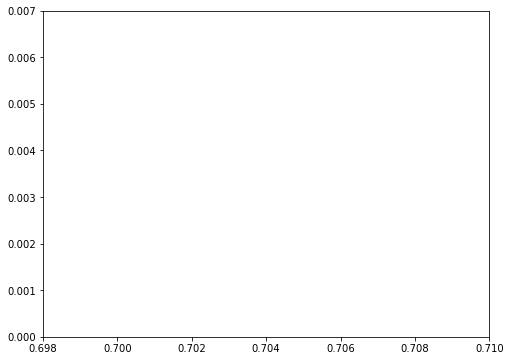

<Figure size 432x288 with 0 Axes>

0.003967790450396835


<Figure size 432x288 with 0 Axes>

0.0037793738163935595


<Figure size 432x288 with 0 Axes>

0.0037599324298450815


<Figure size 432x288 with 0 Axes>

0.003665977409810174


<Figure size 432x288 with 0 Axes>

0.00356785486970581


<Figure size 432x288 with 0 Axes>

0.003496364903224908


<Figure size 432x288 with 0 Axes>

0.003203310419620629


<Figure size 432x288 with 0 Axes>

0.0029822703740215255


<Figure size 432x288 with 0 Axes>

0.0029803280909887642


<Figure size 432x288 with 0 Axes>

0.0029795874433240672


<Figure size 432x288 with 0 Axes>

0.0029788709893920546


<Figure size 432x288 with 0 Axes>

0.002978850684833008


<Figure size 432x288 with 0 Axes>

0.0029788455171924026


<Figure size 432x288 with 0 Axes>

0.0029788358625743652


<Figure size 432x288 with 0 Axes>

0.0029787168495354253


<Figure size 432x288 with 0 Axes>

0.0029787102000520442


<Figure size 432x288 with 0 Axes>

0.0029786981829425475


<Figure size 432x288 with 0 Axes>

0.0029786968396845726


<Figure size 432x288 with 0 Axes>

0.0029786121403523364


<Figure size 432x288 with 0 Axes>

0.0029774102654310593


<Figure size 432x288 with 0 Axes>

0.0029771964172670314


<Figure size 432x288 with 0 Axes>

0.002977196294782919


<Figure size 432x288 with 0 Axes>

0.0029771960459972907


<Figure size 432x288 with 0 Axes>

0.002977031135882981


<Figure size 432x288 with 0 Axes>

0.0029764739542123236


<Figure size 432x288 with 0 Axes>

0.0029394114104287776


<Figure size 432x288 with 0 Axes>

0.0029200586354003817


<Figure size 432x288 with 0 Axes>

0.0029196375026989936


<Figure size 432x288 with 0 Axes>

0.002919579817815331


<Figure size 432x288 with 0 Axes>

0.002919408288945633


<Figure size 432x288 with 0 Axes>

0.002919354365267143


<Figure size 432x288 with 0 Axes>

0.0029193449407676573


<Figure size 432x288 with 0 Axes>

0.0029193168825883296


<Figure size 432x288 with 0 Axes>

0.0029193138629374804


<Figure size 432x288 with 0 Axes>

0.0029193087419555792


<Figure size 432x288 with 0 Axes>

0.002919124034474665


<Figure size 432x288 with 0 Axes>

0.002919121232976324


<Figure size 432x288 with 0 Axes>

0.002919085323517738


KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

In [20]:
%matplotlib inline
initGuess= np.append(X,Y)

spmin=spo.minimize(scoreWdivI, initGuess, method='SLSQP', tol=1e-15, bounds=[(0,1)]*8)
diags = spmin['x'].reshape(-1,2)
X=diags[:2]
Y=diags[2:]

plt.ion()
f,ax = plt.subplots(1,1,figsize=(8,6))
ax.set_xlim((0.698,0.71))
ax.set_ylim((0,0.007))


ax.scatter(X[:,0],X[:,1])
ax.scatter(Y[:,0],Y[:,1])
#plt.show()
plt.pause(0.1)
plt.draw()
while(spmin['fun']>0.0002):
    initGuess= np.append(X,Y)

    spmin=spo.minimize(scoreWdivI, initGuess, method='TNC', tol=1e-15, bounds=[(0,1)]*8)
    diags = spmin['x'].reshape(-1,2)
    X=diags[:2]
    Y=diags[2:]
    #spmin=spo.minimize(scoreWdivI, initGuess, method='L-BFGS-B', tol=1e-12, bounds=[(0,1)]*8)
    diags = spmin['x'].reshape(-1,2)
    X=diags[:2]
    Y=diags[2:]
    #spmin=spo.minimize(scoreWdivI, initGuess, method='SLSQP', tol=1e-12, bounds=[(0,1)]*8)
    diags = spmin['x'].reshape(-1,2)
    X=diags[:2]
    Y=diags[2:]
    plt.clf()
    ax.scatter(X[:,0],X[:,1])
    ax.scatter(Y[:,0],Y[:,1])
    plt.pause(0.1)
    plt.draw()
    #plt.show()
    print(spmin['fun'])
print(spmin['fun'])

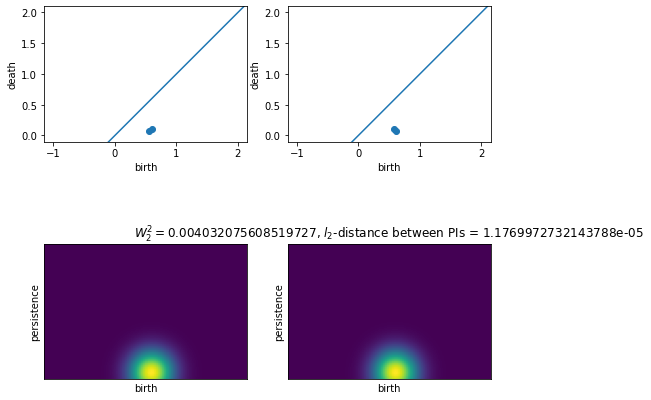

0.002919085323517738


In [22]:
diags = spmin['x'].reshape(-1,2)
X=diags[:2]
Y=diags[2:]

W=skewWasserstein2sq(X,Y)
        
pi1 = pimgr.transform(X, skew=False)
pi2 = pimgr.transform(Y, skew=False)
I=np.linalg.norm(pi1.flatten()-pi2.flatten(), ord=2)

f,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(8,8))
plt.title("$W_2^2=${}, $l_2$-distance between PIs = {}".format(W,I))

pimgr.plot_diagram(X, ax=ax1, skew=False)
pimgr.plot_diagram(Y, ax=ax2, skew=False)


pimgr.plot_image(pi1, ax = ax3)
pimgr.plot_image(pi2, ax = ax4)

plt.show()
print(I/W)

In [23]:
print(X)
print(Y)
scoreWdivI(np.append(X,Y))
#spmin['fun']

[[0.60851551 0.11179695]
 [0.55708666 0.07546312]]
[[0.61038828 0.0755542 ]
 [0.57447407 0.1114684 ]]


0.002919085323517738

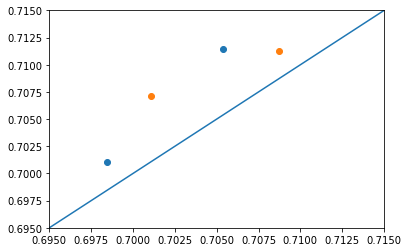

2.187346213002542e-05
3.785145388159959e-05


In [24]:
#%matplotlib widget
f,ax=plt.subplots()
X=np.array([[0.70537897, 0.00608924], [0.69843414, 0.00257986]])
Y=np.array([[0.70869304, 0.00257821], [0.70107226, 0.00609094]])
X[:,1]+=X[:,0]
Y[:,1]+=Y[:,0]
ax.scatter(X[:,0],X[:,1])
ax.scatter(Y[:,0],Y[:,1])
ax.axline((0,0),slope=1)
ax.set_xlim((0.695,0.715))
ax.set_ylim((0.695,0.715))
plt.show()
print(((X[1,1]-X[1,0])/2)**2+((Y[0,1]-Y[0,0])/2)**2+(X[0,0]-Y[1,0])**2)
print((X[0,1]-Y[0,1])**2+(X[1,1]-Y[1,1])**2)

In [ ]:
[[0.70537897 0.00608924]
 [0.69843414 0.00257986]]
[[0.70869304 0.00257821]
 [0.70107226 0.00609094]]
